In [22]:
import xarray as xr
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import plotly.io as pio
from tqdm  import tqdm
import plotly.graph_objects as go
pio.renderers.default = "browser"

In [6]:
username = 'michael.gilmont'  # replace with your username
password = 'Xeimae7u'  # replace with your password
MODEL = 'MONARCH'
YEAR = 2023
MONTH = 10
# DAY = 31
HOUR_START = 12
DRY_DUST = "dust_depd"
WET_DUST = "dust_depw"
model_code = f'{HOUR_START}_3H_SDSWAS_NMMB-BSC-v2_OPER'

NORTH_END_POINT = 35.613511
WEST_END_POINT = 31.561433
SOUTH_END_POINT = 12.678888
EAST_END_POINT = 63.224030

In [8]:
mounth_ds = []
for day in range(1, 2):
    two_digit_day = str(day).zfill(2)
    opendap_url = f"dust.aemet.es/thredds/dodsC/dataRoot/{MODEL}/{YEAR}/{MONTH}/" \
                  f"{YEAR}{MONTH}{two_digit_day}{model_code}.nc"
    url = f"https://{username}:{password}@{opendap_url}"
    ds = xr.open_dataset(url)
    print(len(ds.lat))
    print(len(ds.lon))
    ds = ds[[DRY_DUST, WET_DUST]]
    # ds.to_netcdf("ds_output.nc")
    # Convert seconds to datetime
    start_datetime = datetime(YEAR, MONTH, day, HOUR_START, 0, 0)
    end_datetime = pd.to_timedelta(1, unit="d") + start_datetime
    if not np.issubdtype(ds.coords["time"].dtype, np.datetime64):
        new_time = pd.to_timedelta(ds["time"], unit="h") + start_datetime
        ds = ds.assign_coords(time=new_time)
    ds = ds.sel(time=slice(start_datetime, end_datetime))
    ds = ds.where((ds.lat >= SOUTH_END_POINT) & (ds.lat <= NORTH_END_POINT) &
                  (ds.lon >= WEST_END_POINT) & (ds.lon <= EAST_END_POINT), drop=True)
    coarsened_ds = ds.coarsen(lat=len(ds.lat)/5, lon=len(ds.lon)/5, boundary="trim").sum()
    print()
    # dry_values = ds[DRY_DUST]
    # sum_hist, _, _ = np.histogram2d(ds.lat, ds.lon, bins=[new_lat, new_lon], weights=dry_values)
    # sum_hist
    # change to interplation!!!!!!
    # ds_resampled = ds.interp(lat=new_lat, lon=new_lon)
    # mounth_ds.append(ds_resampled)

825
1650


KeyboardInterrupt: 

In [ ]:
aligned_datasets = xr.align(*mounth_ds, join="outer")  # or "inner"
combined_ds = xr.concat(aligned_datasets, dim="time")
# combined_ds.to_netcdf("output.nc")
print(combined_ds)
# Plot the data
# dry_dust_data.plot()
#
# # Customize the plot
# plt.title(f"'dry_dust' at lat={specific_lat}, lon={specific_lon}")
# plt.xlabel("Time")
# plt.ylabel("Dry Dust Concentration")
# plt.grid(True)
# plt.show()

In [5]:
dry_dust_data = combined_ds[DRY_DUST].sel(lat=13.25, lon=32.15,  method="nearest")


In [6]:
dry_dust_data

<xarray.DataArray 'dust_depd' (time: 132)> Size: 1kB
array([1.25862687e-06, 2.46119407e-06, 1.37833945e-06, 8.06943888e-07,
       5.88598482e-07, 2.02334007e-07, 2.26398313e-08, 5.53584130e-07,
       2.74216768e-06,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 2.74216768e-06, 3.16781620e-06, 1.18037929e-06,
       1.75417824e-07, 3.40238614e-07, 3.24436002e-07, 1.01806549e-07,
       8.91890295e-07, 2.59038870e-06,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 2.59038870e-06, 5.71927671e-07,
       4.09046265e-07, 7.98711369e-07, 3.89910753e-07, 6.34373549e-08,
       1.86498994e-08, 3.39494449e-07, 1.62494348e-06,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 1.62494348e-06,
       1.53765336e-06, 8.63157595e-07, 4.38149442e-07, 3.88425377e-07,
       2.69199631e-07, 1.55122009e-07, 4.58746456e-07, 1.33061735e-06])
Coordinates:
  * time     (time) datetime64[ns] 1kB 2023-10-01T12:00:00 ... 2023-10-05T12:...
    lat      float64 8B 13.25
    lon      float64 8B 32.15
Attributes:
    grid_mapping:  crs
    units:         kg m-2 s-1
    _ChunkSizes:   [  1 413 825]

In [ ]:
# !pip install matplotlib

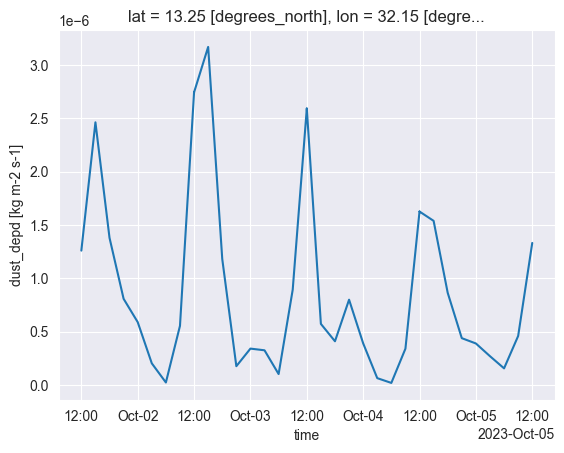

In [7]:
import matplotlib
dry_dust_data.plot()

In [8]:
aligned_datasets = xr.align(*mounth_ds, join="outer")  # or "inner"
combined_ds = xr.concat(aligned_datasets, dim="time")
combined_ds.to_netcdf("output.nc")
print(combined_ds)
# Plot the data
# dry_dust_data.plot()
#
# # Customize the plot
# plt.title(f"'dry_dust' at lat={specific_lat}, lon={specific_lon}")
# plt.xlabel("Time")
# plt.ylabel("Dry Dust Concentration")
# plt.grid(True)
# plt.show()

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 132, lat: 46, lon: 63)
Coordinates:
  * time       (time) datetime64[ns] 1kB 2023-10-01T12:00:00 ... 2023-10-05T1...
  * lat        (lat) float64 368B 12.75 13.25 13.75 14.25 ... 34.25 34.75 35.25
  * lon        (lon) float64 504B 31.65 32.15 32.65 33.15 ... 61.65 62.15 62.65
Data variables:
    dust_depd  (time, lat, lon) float64 3MB 1.965e-06 2.419e-06 ... 5.177e-06
    dust_depw  (time, lat, lon) float64 3MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    Domain:                          Regional
    Conventions:                     CF-1.7
    comment:                         Generated on cirrus
    NCO:                             netCDF Operators version 4.8.1 (Homepage...
    history:                         Mon Oct  2 23:00:55 2023: ncap2 -O -v -s...
    history_of_appended_files:       Sun Oct  1 18:04:19 2023: Appended file ...
    DODS_EXTRA.Unlimited_Dimension:  time


In [9]:
dry_dust_data = combined_ds[DRY_DUST].sel(lat=13.25, lon=32.15,  method="nearest")


In [10]:
dry_dust_data

<xarray.DataArray 'dust_depd' (time: 132)> Size: 1kB
array([1.25862687e-06, 2.46119407e-06, 1.37833945e-06, 8.06943888e-07,
       5.88598482e-07, 2.02334007e-07, 2.26398313e-08, 5.53584130e-07,
       2.74216768e-06,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 2.74216768e-06, 3.16781620e-06, 1.18037929e-06,
       1.75417824e-07, 3.40238614e-07, 3.24436002e-07, 1.01806549e-07,
       8.91890295e-07, 2.59038870e-06,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan, 2.59038870e-06, 5.71927671e-07,
       4.09046265e-07, 7.98711369e-07, 3.89910753e-07, 6.34373549e-08,
       1.86498994e-08, 3.39494449e-07, 1.62494348e-06,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan, 1.62494348e-06,
       1.53765336e-06, 8.63157595e-07, 4.38149442e-07, 3.88425377e-07,
       2.69199631e-07, 1.55122009e-07, 4.58746456e-07, 1.33061735e-06])
Coordinates:
  * time     (time) datetime64[ns] 1kB 2023-10-01T12:00:00 ... 2023-10-05T12:...
    lat      float64 8B 13.25
    lon      float64 8B 32.15
Attributes:
    grid_mapping:  crs
    units:         kg m-2 s-1
    _ChunkSizes:   [  1 413 825]

In [11]:
# !pip install matplotlib

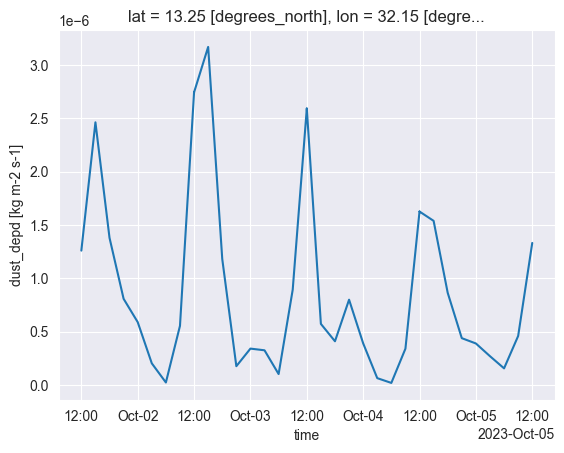

In [12]:
import matplotlib
dry_dust_data.plot()

In [ ]:
aligned_datasets = xr.align(*mounth_ds, join="outer")  # or "inner"
combined_ds = xr.concat(aligned_datasets, dim="time")
combined_ds.to_netcdf("output.nc")
print(combined_ds)
# Plot the data
# dry_dust_data.plot()
#
# # Customize the plot
# plt.title(f"'dry_dust' at lat={specific_lat}, lon={specific_lon}")
# plt.xlabel("Time")
# plt.ylabel("Dry Dust Concentration")
# plt.grid(True)
# plt.show()

In [ ]:
dry_dust_data = combined_ds[DRY_DUST].sel(lat=13.25, lon=32.15,  method="nearest")


In [ ]:
dry_dust_data

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib
dry_dust_data.plot()

In [9]:
# Convert data to a DataFrame for Seaborn
df = dry_dust_data.to_dataframe().reset_index()
df

,time,lat,lon,dust_depd
0,2023-10-01 12:00:00,13.25,32.15,1.258627e-06
1,2023-10-01 15:00:00,13.25,32.15,2.461194e-06
2,2023-10-01 18:00:00,13.25,32.15,1.378339e-06
3,2023-10-01 21:00:00,13.25,32.15,8.069439e-07
4,2023-10-02 00:00:00,13.25,32.15,5.885985e-07
...,...,...,...,...
127,2023-10-05 00:00:00,13.25,32.15,3.884254e-07
128,2023-10-05 03:00:00,13.25,32.15,2.691996e-07
129,2023-10-05 06:00:00,13.25,32.15,1.551220e-07
130,2023-10-05 09:00:00,13.25,32.15,4.587465e-07


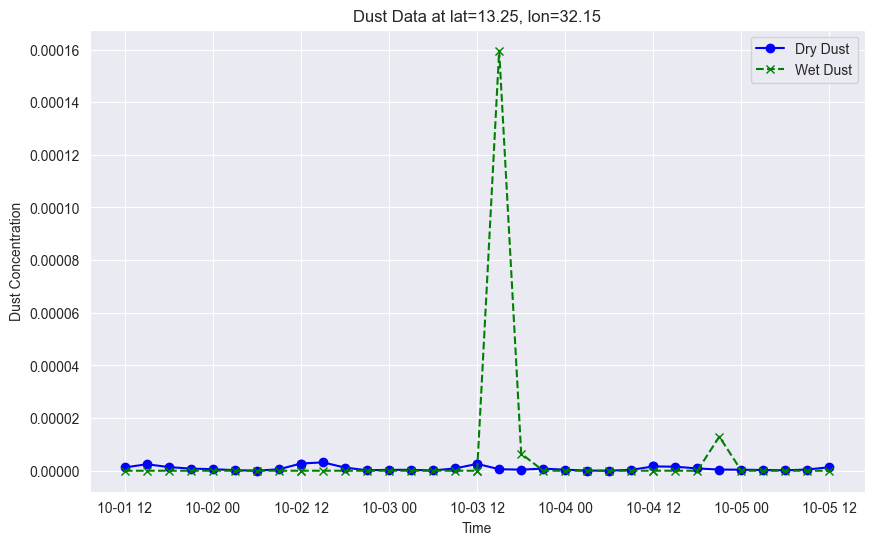

In [13]:
import matplotlib.pyplot as plt

# Specify the latitude and longitude
specific_lat = 13.25
specific_lon = 32.15
# Select the data for dry and wet dust
dry_dust_data = combined_ds[DRY_DUST].sel(lat=specific_lat, lon=specific_lon, method="nearest")
wet_dust_data = combined_ds[WET_DUST].sel(lat=specific_lat, lon=specific_lon, method="nearest")

# Extract time and values
time = dry_dust_data["time"].values
dry_values = dry_dust_data.values
wet_values = wet_dust_data.values

# Plot both variables
plt.figure(figsize=(10, 6))
plt.plot(time, dry_values, label="Dry Dust", marker="o", linestyle="-", color="b")
plt.plot(time, wet_values, label="Wet Dust", marker="x", linestyle="--", color="g")

# Customize the plot
plt.title(f"Dust Data at lat={specific_lat}, lon={specific_lon}")
plt.xlabel("Time")
plt.ylabel("Dust Concentration")
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import plotly.graph_objects as go

# Extract time and values
time = dry_dust_data["time"].values
dry_values = dry_dust_data.values
wet_values = wet_dust_data.values

# Create a Plotly figure
fig = go.Figure()

# Add dry dust data
fig.add_trace(go.Scatter(x=time, y=dry_values, mode='lines+markers', name="Dry Dust", line=dict(color='blue')))

# Add wet dust data
fig.add_trace(go.Scatter(x=time, y=wet_values, mode='lines+markers', name="Wet Dust", line=dict(color='green')))

# Customize layout
fig.update_layout(
    title=f"Dust Data at lat={specific_lat}, lon={specific_lon}",
    xaxis_title="Time",
    yaxis_title="Dust Concentration",
    legend_title="Legend",
    template="plotly_white"
)

fig.show()


In [20]:
time

array(['2023-10-04T12:00:00.000000000', '2023-10-04T15:00:00.000000000',
       '2023-10-04T18:00:00.000000000', '2023-10-04T21:00:00.000000000',
       '2023-10-05T00:00:00.000000000', '2023-10-05T03:00:00.000000000',
       '2023-10-05T06:00:00.000000000', '2023-10-05T09:00:00.000000000',
       '2023-10-05T12:00:00.000000000'], dtype='datetime64[ns]')

In [34]:
import plotly.graph_objects as go

def plot_graph(ds, specific_lat, specific_lon):
    dry_dust_data = ds[DRY_DUST].sel(lat=specific_lat, lon=specific_lon, method="nearest")
    wet_dust_data = ds[WET_DUST].sel(lat=specific_lat, lon=specific_lon, method="nearest")
    # Extract time and values
    time = dry_dust_data["time"].values
    dry_values = dry_dust_data.values
    wet_values = wet_dust_data.values
    # Create a Plotly figure
    fig = go.Figure()

    # Add dry dust bars
    fig.add_trace(go.Bar(x=time, y=dry_values, name="Dry Dust", marker_color="blue"))

    # Add wet dust bars
    fig.add_trace(go.Bar(x=time, y=wet_values, name="Wet Dust", marker_color="green"))

    # Customize layout
    fig.update_layout(
        barmode="group",  # Group bars side by side
        title=f"Dust Data at lat={specific_lat}, lon={specific_lon}",
        xaxis_title="Time",
        yaxis_title="Dust Concentration",
        legend_title="Legend",
        template="plotly_white"
    )

    fig.show()

In [35]:
plot_graph(combined_ds, specific_lat,specific_lon)

In [11]:
import xarray as xr
import pandas as pd
from datetime import datetime
import numpy as np
import plotly.graph_objects as go

In [9]:
start_time = datetime.now()
mounth_ds = []
for day in tqdm(range(1,3), desc="Fetching Datasets", unit="day"):
    two_digit_day = str(day).zfill(2)
    opendap_url = f"dust.aemet.es/thredds/dodsC/dataRoot/{MODEL}/{YEAR}/{MONTH}/" \
                  f"{YEAR}{MONTH}{two_digit_day}{model_code}.nc"
    url = f"https://{username}:{password}@{opendap_url}"
    ds = xr.open_dataset(url)
    ds = ds[[DRY_DUST, WET_DUST]]
    start_datetime = datetime(YEAR, MONTH, day, HOUR_START, 0, 0)
    end_datetime = pd.to_timedelta(23, unit="h") + start_datetime
    ds = ds.sel(time=slice(start_datetime, end_datetime))
    specific_lat, specific_lon = 24.7, 55.4
    nearest_data = ds.sel(lat=specific_lat, lon=specific_lon, method="nearest")
    # ds = ds.where((ds.lat >= SOUTH_END_POINT) & (ds.lat <= NORTH_END_POINT) &
    #               (ds.lon >= WEST_END_POINT) & (ds.lon <= EAST_END_POINT), drop=True)
    mounth_ds.append(nearest_data)
aligned_datasets = xr.align(*mounth_ds, join="outer")  # or "inner"
combined_ds = xr.concat(aligned_datasets, dim="time")
end_time = datetime.now()
execution_time = (end_time - start_time).total_seconds()
print(f"Execution time: {execution_time} seconds")


Fetching Datasets: 100%|██████████| 2/2 [00:02<00:00,  1.10s/day]


Execution time: 6.944145 seconds


In [13]:
combined_ds.data_vars

Data variables:
    dust_depd  (time) float32 128B 1.853e-05 1.795e-05 ... 1.517e-06 1.196e-05
    dust_depw  (time) float32 128B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [14]:
data = combined_ds

In [17]:
dry_dust_data = data[DRY_DUST].values
wet_dust_data = data[WET_DUST].values
time =data["time"].values

In [16]:
dry_dust_data

<xarray.DataArray 'dust_depd' (time: 32)> Size: 128B
array([1.8525978e-05, 1.7954197e-05, 1.5403596e-06, 5.3633585e-07,
       6.3959044e-07, 7.0560321e-07, 2.4252081e-06, 7.6283732e-06,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
       1.1513321e-05, 9.6821213e-06, 1.5465741e-06, 8.8353363e-07,
       5.7404577e-07, 3.0415930e-07, 1.5165239e-06, 1.1958684e-05],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 256B 2023-10-01T12:00:00 ... 2023-10-03T09...
    lat      float64 8B 24.65
    lon      float64 8B 55.35
Attributes:
    grid_mapping:  crs
    units:         kg m-2 s-1
    _ChunkSizes:   [  1 413 825]

In [23]:
def plot_graph(dry_values, wet_values, time):
    # dry_dust_data = ds[DRY_DUST].sel(lat=specific_lat, lon=specific_lon, method="nearest")
    # wet_dust_data = ds[WET_DUST].sel(lat=specific_lat, lon=specific_lon, method="nearest")
    # # Extract time and values
    # time =ds["time"].values
    # dry_values = dry_dust_data.values
    # wet_values = wet_dust_data.values
    # Create a Plotly figure
    fig = go.Figure()

    # Add dry dust bars
    fig.add_trace(go.Bar(x=time, y=dry_values, name="Dry Dust", marker_color="blue"))

    # Add wet dust bars
    fig.add_trace(go.Bar(x=time, y=wet_values, name="Wet Dust", marker_color="green"))

    # Customize layout
    fig.update_layout(
        barmode="group",  # Group bars side by side
        title=f"Dust Data at lat={specific_lat:.1f}, lon={specific_lon:.1f}",
        xaxis_title="Time",
        yaxis_title="Dust Concentration",
        legend_title="Legend",
        template="plotly_white"
    )

    fig.show()

In [29]:
time

array(['2023-10-01T12:00:00.000000000', '2023-10-01T15:00:00.000000000',
       '2023-10-01T18:00:00.000000000', '2023-10-01T21:00:00.000000000',
       '2023-10-02T00:00:00.000000000', '2023-10-02T03:00:00.000000000',
       '2023-10-02T06:00:00.000000000', '2023-10-02T09:00:00.000000000',
       '2023-10-02T12:00:00.000000000', '2023-10-02T15:00:00.000000000',
       '2023-10-02T18:00:00.000000000', '2023-10-02T21:00:00.000000000',
       '2023-10-03T00:00:00.000000000', '2023-10-03T03:00:00.000000000',
       '2023-10-03T06:00:00.000000000', '2023-10-03T09:00:00.000000000',
       '2023-10-01T12:00:00.000000000', '2023-10-01T15:00:00.000000000',
       '2023-10-01T18:00:00.000000000', '2023-10-01T21:00:00.000000000',
       '2023-10-02T00:00:00.000000000', '2023-10-02T03:00:00.000000000',
       '2023-10-02T06:00:00.000000000', '2023-10-02T09:00:00.000000000',
       '2023-10-02T12:00:00.000000000', '2023-10-02T15:00:00.000000000',
       '2023-10-02T18:00:00.000000000', '2023-10-02

In [30]:
plot_graph(dry_dust_data, wet_dust_data, time)

<xarray.DataArray 'lat' ()> Size: 8B
array(24.65)
Coordinates:
    lat      float64 8B 24.65
    lon      float64 8B 55.45
Attributes:
    axis:           Y
    long_name:      latitude coordinate
    standard_name:  latitude
    units:          degrees_north


In [30]:

dry_dust_data = data[DRY_DUST]
wet_dust_data = data[WET_DUST]
# Extract time and values
time =data["time"].values
print(lat, lon)

KeyError: "no index found for coordinate 'lat'"

In [24]:
dry_dust_data = ds.sel(lat=specific_lat, lon=specific_lon, method="bfill")
dry_dust_data.lat

<xarray.DataArray 'lat' ()> Size: 8B
array(24.75)
Coordinates:
    lat      float64 8B 24.75
    lon      float64 8B 55.45
Attributes:
    axis:           Y
    long_name:      latitude coordinate
    standard_name:  latitude
    units:          degrees_north

In [15]:
longitude, latitude  = 24.73, 55.42
plot_graph(combined_ds, latitude, longitude)